In [3]:
import numpy as np
import databroker
from PyQt5.QtWidgets import QApplication
from PyQt5 import uic, QtCore
import sys
# from xview import xview
# from xview.spectra_db.db_io import get_spectrum_catalog
import os
import requests
from requests.packages.urllib3.exceptions import InsecureRequestWarning
# requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
import pandas as pd
import jellyfish
from matplotlib import pyplot as plt

In [4]:
db = databroker.Broker.named('iss-local')
db_old = databroker.Broker.named('iss')


In [179]:
elements_to_search = ['Fe']

def find_all_scans_for_element(element, db):
    return db.v2.search({'element' : element})

def search_db_for_scans(db_list, df_uid, elements_to_search):
    for element in elements_to_search:
        element_uids = list(find_all_scans_for_element(element, db))[:200]
        n_uids = len(element_uids)
        for i, uid in enumerate(element_uids):
            if i % 100 == 0: print(f'Progress: {i} / {n_uids}')
            start = db[uid].start
            for key in df_uid.keys():
                val = start[key]
                df_uid[key].append(val)
            
#             name = start['name']
#             edge = start['edge']
#             proposal = 
#             year = 
#             cycle = 
#             df_uid['element'].append(element)
#             df_uid['edge'].append(edge)
#             df_uid['uid'].append(uid)
#             df_uid['name'].append(name)


df_uid = {'element' : [], 'edge' : [], 'uid' : [], 'year': [], 'cycle': [], 'PROPOSAL' : [], 'time' : [], 'name' : []}
search_db_for_scans([db], df_uid, elements_to_search)

print(df_uid)

Progress: 0 / 200
Progress: 100 / 200


{'element': ['Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe

In [47]:
db_old.v2['88cb7285-def9-4ee2-86a9-dcfc5d99eee0'].metadata['start']

Start({'Facility': 'NSLS-II',
 'PI': 'Byung Ko',
 'PROPOSAL': '305091',
 'SAF': '305267',
 'angle_offset': '0.1856666294555667',
 'beamline_id': 'ISS (8-ID)',
 'comment': '',
 'cycle': '3',
 'e0': '8979',
 'edge': 'K',
 'element': 'Cu',
 'element_full': 'Copper',
 'experiment': 'fly_energy_scan',
 'group': 'iss',
 'interp_filename': '/nsls2/xf08id/users/2019/3/305091/121119_Cu(2)NitratePowder_Standard '
                    '0001.raw',
 'name': '121119_Cu(2)NitratePowder_Standard 0001',
 'pba1_adc1 gain': 5,
 'pba1_adc1 offset': -0.08079746111111111,
 'pba1_adc6 gain': 5,
 'pba1_adc6 offset': -0.08648181111111111,
 'pba1_adc7 gain': 5,
 'pba1_adc7 offset': -0.0655459388888889,
 'pba2_adc6 gain': 4,
 'pba2_adc6 offset': -0.028633694444444444,
 'pba2_adc7 offset': -0.0859138,
 'plan_args': {},
 'plan_name': 'execute_trajectory',
 'plan_type': 'generator',
 'proposal_id': None,
 'pulses_per_degree': 359999.99999999715,
 'scan_id': 75165,
 'time': 1576095427.4602408,
 'trajectory_name': 'Cu

In [180]:
df_uid = pd.DataFrame(df_uid)
df_uid['scan_group'] = None
df_uid

,element,edge,uid,year,cycle,PROPOSAL,time,name,scan_group
0,Fe,K,a3bb35b3-c45d-48c2-bd77-52f57f2a0ec0,2022,1,310588,1.649363e+09,Fe K-edge foil energy calibration,None
1,Fe,K,65b07bfe-ff24-4725-bf02-e24565d1bd77,2022,1,310588,1.649363e+09,Fe K-edge foil energy calibration,None
2,Fe,K,be0eb153-995c-42c5-9dee-afcda939bd79,2022,1,309775,1.649359e+09,SV_Delta 0001,None
3,Fe,K,7470982c-e474-4a76-a42b-9d57163fd764,2022,1,309775,1.649358e+09,test SV_Delta 0001,None
4,Fe,K,09ddda74-0117-4628-9ff6-025c13369f77,2022,1,309775,1.649358e+09,test SV_River 0001,None
...,...,...,...,...,...,...,...,...,...
195,Fe,K,4addd435-f277-4d0a-969c-b0b3071adfc0,2022,1,309775,1.649348e+09,BS2-3 (pos 001) Fe-K 0004,None
196,Fe,K,9c0d71ec-2cc7-495e-9393-a90f32982a2c,2022,1,309775,1.649348e+09,BS2-3 (pos 001) Fe-K 0003,None
197,Fe,K,525bc517-9008-4e3e-b5f1-23b1708b951a,2022,1,309775,1.649348e+09,BS2-3 (pos 001) Fe-K 0002,None
198,Fe,K,29682e9c-1905-4bf9-971d-fd21aa49407c,2022,1,309775,1.649348e+09,BS2-3 (pos 001) Fe-K 0001,None


In [181]:
def filter_df_uid_by_strings(df_uid, strings_to_drop):
    return df_uid[~df_uid['name'].str.contains('|'.join(strings_to_drop))]
    
strings_to_drop = ['test', 'bla', 'calibration']
df_uid = filter_df_uid_by_strings(df_uid, strings_to_drop)



In [182]:
from operator import iand
from functools import reduce

def get_relevant_scans_for_row(df_uid, row, time_window=600, ls_dist_thresh=4):
    # filter by element/proposal
    filter_keys = ['element', 'edge', 'year', 'cycle', 'PROPOSAL']
    filter_list = [df_uid[k] == row[k] for k in filter_keys]

    # filter by time
    filter_list.append((row['time'] - df_uid['time']).abs() < time_window)

    relevant_scans = reduce(lambda x, y: x & y, filter_list)
    
    # remove self
    filter_list.append(row.name != df_uid.index) # here we actually filter out the INDEX, not the name
    
    # filter by name
    ls_dist = ~relevant_scans * 100
    ls_dist[relevant_scans] = df_uid['name'][relevant_scans].apply(lambda x: jellyfish.levenshtein_distance(x, row['name']))
    ls_dist_mask = ls_dist <= ls_dist_thresh

    relevant_scans = relevant_scans & (ls_dist_mask)
    # return self
    relevant_scans.loc[row.name] = True
    return relevant_scans



def group_scans(df_uid, time_window=600, ls_dist_thresh=4):
#     scan_group = df_uid['scan_group']
    scan_group_id = 0
    for i in df_uid.index:
        row = df_uid.loc[i]
        
        if row['scan_group'] is None:
            relevant_scans = get_relevant_scans_for_row(df_uid, row, time_window=time_window, ls_dist_thresh=ls_dist_thresh)
#             print(i, '\t', row['name'], '\t', row['scan_group'], '\t', relevant_scans)
            if any(relevant_scans):
                df_uid.loc[relevant_scans, ('scan_group',)] = scan_group_id
            else:
                df_uid.loc[i, ('scan_group',)] = scan_group_id
            scan_group_id += 1
#             scan_group.loc[(relevant_scans,), :] = 1
#             print(relevant_scans)
        

group_scans(df_uid)

# names_list = df_uid.name.values.tolist()
# similarity_list = []

# for name_i in names_list:
#     for name_j in names_list:
#         val = jellyfish.levenshtein_distance(name_i, name_j)
#         similarity_list.append(val)
#     print(name, val)



2 	 SV_Delta 0001 	 None 	 2       True
5      False
6      False
7      False
8      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


5 	 SV_Delta (pos 001) Fe-K  0010 	 None 	 2      False
5       True
6       True
7       True
8       True
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


15 	 SV_River (pos 001) Fe-K  0010 	 None 	 2      False
5      False
6      False
7      False
8      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


26 	 D5B2-S (pos 001) Fe-K  0010 	 None 	 2      False
5      False
6      False
7      False
8      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


36 	 SV_lake (pos 001) Fe-K  0010 	 None 	 2      False
5      False
6      False
7      False
8      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


46 	 HV004 (pos 001) Fe-K  0010 	 None 	 2      False
5      False
6      False
7      False
8      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


57 	 OS001 (pos 001) Fe-K  0009 	 None 	 2      False
5      False
6      False
7      False
8      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


66 	 SV10A (pos 001) Fe-K  0010 	 None 	 2      False
5      False
6      False
7      False
8      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


78 	 NAU-1 (pos 001) Fe-K  0010 	 None 	 2      False
5      False
6      False
7      False
8      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


88 	 GP-sap (pos 001) Fe-K  0010 	 None 	 2      False
5      False
6      False
7      False
8      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


99 	 NAU-1 (pos 001) Fe-K  0010 	 None 	 2      False
5      False
6      False
7      False
8      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


109 	 GP-sap (pos 001) Fe-K  0010 	 None 	 2      False
5      False
6      False
7      False
8      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


119 	 CCa-2 (pos 001) Fe-K  0010 	 None 	 2      False
5      False
6      False
7      False
8      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


129 	 IGC4 (pos 001) Fe-K  0010 	 None 	 2      False
5      False
6      False
7      False
8      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


139 	 Seafloor2 (pos 001) Fe-K  0010 	 None 	 2      False
5      False
6      False
7      False
8      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


149 	 IGC2 (pos 001) Fe-K  0010 	 None 	 2      False
5      False
6      False
7      False
8      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


160 	 ISCz-1 (pos 001) Fe-K  0009 	 None 	 2      False
5      False
6      False
7      False
8      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


169 	 BS4_0-10cm (pos 001) Fe-K  0010 	 None 	 2      False
5      False
6      False
7      False
8      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


179 	 BS2-4 (pos 001) Fe-K  0010 	 None 	 2      False
5      False
6      False
7      False
8      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


194 	 BS2-3 (pos 001) Fe-K  0005 	 None 	 2      False
5      False
6      False
7      False
8      False
       ...  
195     True
196     True
197     True
198     True
199     True
Length: 193, dtype: bool


/home/xf08id/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [189]:
pd.set_option('display.max_rows', None)
df_uid

,element,edge,uid,year,cycle,PROPOSAL,time,name,scan_group
2,Fe,K,be0eb153-995c-42c5-9dee-afcda939bd79,2022,1,309775,1.649359e+09,SV_Delta 0001,0
5,Fe,K,dc721171-c776-44d3-bd77-45149c6b2f90,2022,1,309775,1.649358e+09,SV_Delta (pos 001) Fe-K 0010,1
6,Fe,K,280d5c43-104b-4c5b-81d2-7033bd597df5,2022,1,309775,1.649358e+09,SV_Delta (pos 001) Fe-K 0009,1
7,Fe,K,1a878b0b-a070-4c85-bbb5-16eb42119e6f,2022,1,309775,1.649358e+09,SV_Delta (pos 001) Fe-K 0008,1
8,Fe,K,c4a4422a-08ed-4c3e-82e5-f081306bcb89,2022,1,309775,1.649358e+09,SV_Delta (pos 001) Fe-K 0007,1
9,Fe,K,07828976-c532-462e-8926-e96e1700ba18,2022,1,309775,1.649358e+09,SV_Delta (pos 001) Fe-K 0006,1
10,Fe,K,f1b5683f-071b-4595-a7b1-ee427984df04,2022,1,309775,1.649358e+09,SV_Delta (pos 001) Fe-K 0005,1
11,Fe,K,65474e8b-4a5f-4a15-8e5c-5270c522d92a,2022,1,309775,1.649358e+09,SV_Delta (pos 001) Fe-K 0004,1
12,Fe,K,d502f0a4-1dcd-4058-9e22-342d26ea4309,2022,1,309775,1.649357e+09,SV_Delta (pos 001) Fe-K 0003,1
13,Fe,K,edf5b14c-9b6f-4e69-91c3-e1b4db4a6d35,2022,1,309775,1.649357e+09,SV_Delta (pos 001) Fe-K 0002,1


(array([  1526.,  12108.,  24656.,      0.,  25416.,  24364.,      0.,
         30434.,  46990.,      0.,  53958.,  57652.,      0.,  42588.,
         29618.,      0.,  48008.,  63830.,      0.,  49288.,  44542.,
         44660.,      0.,  82376., 137914.,      0., 135430.,  90984.,
             0.,  45112.,  32274.,      0.,  52450., 100310.,      0.,
         34438.,  35566.,      0.,  39606.,  48578.,  52488.,      0.,
         68470., 110482.,      0.,  65688.,  38888.,      0.,   9790.,
          2034.,      0.,    500.,    174.,      0.,   1706.,   4000.,
             0.,    252.,    834.,    262.]),
 array([ 0.        ,  0.68333333,  1.36666667,  2.05      ,  2.73333333,
         3.41666667,  4.1       ,  4.78333333,  5.46666667,  6.15      ,
         6.83333333,  7.51666667,  8.2       ,  8.88333333,  9.56666667,
        10.25      , 10.93333333, 11.61666667, 12.3       , 12.98333333,
        13.66666667, 14.35      , 15.03333333, 15.71666667, 16.4       ,
        17.08333333, 

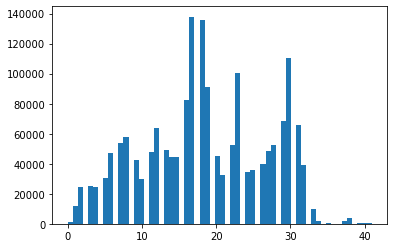

In [26]:
similarity_list
plt.figure(clear=True)

plt.hist(similarity_list, 60);


In [27]:
names_list

['SV_Delta 0001',
 'SV_Delta (pos 001) Fe-K  0010',
 'SV_Delta (pos 001) Fe-K  0009',
 'SV_Delta (pos 001) Fe-K  0008',
 'SV_Delta (pos 001) Fe-K  0007',
 'SV_Delta (pos 001) Fe-K  0006',
 'SV_Delta (pos 001) Fe-K  0005',
 'SV_Delta (pos 001) Fe-K  0004',
 'SV_Delta (pos 001) Fe-K  0003',
 'SV_Delta (pos 001) Fe-K  0002',
 'SV_Delta (pos 001) Fe-K  0001',
 'SV_River (pos 001) Fe-K  0010',
 'SV_River (pos 001) Fe-K  0009',
 'SV_River (pos 001) Fe-K  0008',
 'SV_River (pos 001) Fe-K  0007',
 'SV_River (pos 001) Fe-K  0006',
 'SV_River (pos 001) Fe-K  0005',
 'SV_River (pos 001) Fe-K  0004',
 'SV_River (pos 001) Fe-K  0003',
 'SV_River (pos 001) Fe-K  0002',
 'SV_River (pos 001) Fe-K  0001',
 'D5B2-S (pos 001) Fe-K  0010',
 'D5B2-S (pos 001) Fe-K  0009',
 'D5B2-S (pos 001) Fe-K  0008',
 'D5B2-S (pos 001) Fe-K  0007',
 'D5B2-S (pos 001) Fe-K  0006',
 'D5B2-S (pos 001) Fe-K  0005',
 'D5B2-S (pos 001) Fe-K  0004',
 'D5B2-S (pos 001) Fe-K  0003',
 'D5B2-S (pos 001) Fe-K  0002',
 'D5B2-S (pos 